#### 데이터셋 수집(파일)
- 서울열린데이터광장(https://data.seoul.go.kr/)
    - 서울시 공공자전거 대여소 정보
    - 서울시 공공자전거 대여소별 이용정보
    - 서울시 공공자전거 대여소별 이용정보(시간대별)

In [1]:
import seaborn as sns
sns.set_theme(style='whitegrid')

In [ ]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
import pandas as pd
import numpy as np

In [3]:
import warnings
warnings.simplefilter("ignore")

### 데이터 로드

In [4]:
bike1 = pd.read_excel("./data/대여소 정보.xlsx",skiprows=5,sheet_name='대여소현황',header=None)
bike2 = pd.read_csv("./data/대여소별 이용정보(월별).csv", encoding='cp949')
bike3 = pd.read_csv("./data/이용정보(시간대별).csv", encoding='cp949')

### 데이터 탐색

In [5]:
bike1.head()
bike2.head()
bike3.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2024-12-01,0,1442,1442. 중랑구청 중화동 별관 앞,정기권,NaN,~10대,1,105.32,0.66,2829.30,18
1,2024-12-01,0,2728,2728.마곡나루역 3번 출구,정기권,NaN,~10대,1,22.45,0.25,1090.00,7
2,2024-12-01,0,1023,1023. 한국종합기술사옥 앞,정기권,NaN,20대,1,148.31,0.87,3745.23,21
3,2024-12-01,0,1150,1150. 송정역 1번출구,정기권,NaN,20대,1,24.01,0.19,808.44,6
4,2024-12-01,0,1260,1260. 방이동 한양3차아파트 옆,정기권,NaN,20대,1,92.85,0.94,4042.55,35


In [6]:
# 컬럼명 변경 : 대여소번호,대여소명,자치구,상세주소,위도,경도,설치시기,거치대수lcd,거치대수qr,운영방식
# df1.colums = [] / df1.rename(columns={})
# bike1

bike1.columns = ['대여소번호','대여소명','자치구','상세주소','위도','경도','설치시기','거치대수lcd','거치대수qr','운영방식']
bike1.head(1)

,대여소번호,대여소명,자치구,상세주소,위도,경도,설치시기,거치대수lcd,거치대수qr,운영방식
0,301,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130 경복궁역 7번출구 앞,37.575794,126.971451,2015-10-07 12:03:46,20.0,20.0,QR


In [7]:
bike1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2766 entries, 0 to 2765
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   대여소번호    2766 non-null   int64         
 1   대여소명     2766 non-null   object        
 2   자치구      2766 non-null   object        
 3   상세주소     2766 non-null   object        
 4   위도       2766 non-null   float64       
 5   경도       2766 non-null   float64       
 6   설치시기     2766 non-null   datetime64[ns]
 7   거치대수lcd  1419 non-null   float64       
 8   거치대수qr   1688 non-null   float64       
 9   운영방식     2766 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 216.2+ KB


In [8]:
bike2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13670 entries, 0 to 13669
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   자치구     13670 non-null  object
 1   대여소명    13670 non-null  object
 2   기준년월    13670 non-null  int64 
 3   대여건수    13670 non-null  int64 
 4   반납건수    13670 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 534.1+ KB


In [9]:
bike3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126133 entries, 0 to 2126132
Data columns (total 12 columns):
 #   Column   Dtype  
---  ------   -----  
 0   대여일자     object 
 1   대여시간     int64  
 2   대여소번호    int64  
 3   대여소명     object 
 4   대여구분코드   object 
 5   성별       object 
 6   연령대코드    object 
 7   이용건수     int64  
 8   운동량      object 
 9   탄소량      object 
 10  이동거리(M)  float64
 11  이용시간(분)  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 194.7+ MB


In [10]:
bike2.describe()

,기준년월,대여건수,반납건수
count,13670.000000,13670.000000,13670.000000
mean,202409.001975,1474.636942,1468.314119
std,1.414238,1372.292924,1427.629137
min,202407.000000,0.000000,1.000000
25%,202408.000000,565.000000,509.000000
50%,202409.000000,1090.000000,1076.000000
75%,202410.000000,1926.000000,1947.750000
max,202411.000000,21136.000000,21873.000000


### 데이터 전처리
- 컬럼명 변경, 필요없는 컬럼 정리, 데이터 타입 변경

In [11]:
# bike1 : 상세주소,위도,경도 컬럼 제거
# df.drop()

bike1.drop(columns=['상세주소', '위도', '경도'], inplace=True)


In [12]:
bike1.columns

Index(['대여소번호', '대여소명', '자치구', '설치시기', '거치대수lcd', '거치대수qr', '운영방식'], dtype='object')

In [13]:
# NaN : 0 으로 채우기

# 확인
# bike1.isnull().sum()

bike1['거치대수lcd'].fillna(0, inplace=True)
bike1['거치대수qr'].fillna(0, inplace=True)

In [14]:
bike1.isnull().sum()

대여소번호      0
대여소명       0
자치구        0
설치시기       0
거치대수lcd    0
거치대수qr     0
운영방식       0
dtype: int64

In [15]:
# bike1 전체 데이터 타입 확인
# bike1.dtypes

# 대여소번호 int64 => object
# pd.to_numeric()
# df.astype('int64')

bike1['대여소번호'] = bike1['대여소번호'].astype('object')
bike1['대여소번호'].dtypes

dtype('O')

In [16]:
# 대여소명 숫자와 문자 분리
# 새로운 컬럼에 값 담기


bike2['대여소번호'] = bike2['대여소명'].str.split(".",expand=True)[0]
bike2['대여소명_new'] = bike2['대여소명'].str.split(".",expand=True)[1]

In [17]:
bike2.head(3)

,자치구,대여소명,기준년월,대여건수,반납건수,대여소번호,대여소명_new
0,마포구,108. 서교동 사거리,202407,1597,1609,108,서교동 사거리
1,양천구,729. 서부식자재마트 건너편,202407,1932,2113,729,서부식자재마트 건너편
2,양천구,731. 서울시 도로환경관리센터,202407,3580,3698,731,서울시 도로환경관리센터


In [ ]:

# bike2[bike2['대여소명_new'].isnull()]

# 대여소명_new none 인 데이터는 제거
bike2['대여소명_new'].dropna(inplace=True)

In [18]:
bike3.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2024-12-01,0,1442,1442. 중랑구청 중화동 별관 앞,정기권,NaN,~10대,1,105.32,0.66,2829.30,18
1,2024-12-01,0,2728,2728.마곡나루역 3번 출구,정기권,NaN,~10대,1,22.45,0.25,1090.00,7
2,2024-12-01,0,1023,1023. 한국종합기술사옥 앞,정기권,NaN,20대,1,148.31,0.87,3745.23,21
3,2024-12-01,0,1150,1150. 송정역 1번출구,정기권,NaN,20대,1,24.01,0.19,808.44,6
4,2024-12-01,0,1260,1260. 방이동 한양3차아파트 옆,정기권,NaN,20대,1,92.85,0.94,4042.55,35


In [19]:
# bike3 대여소명 분리
# 대여소명_new 컬럼만 생성

bike3['대여소명_new'] = bike3['대여소명'].str.split(".",expand=True)[1]

In [20]:
bike3.head(1)

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),대여소명_new
0,2024-12-01,0,1442,1442. 중랑구청 중화동 별관 앞,정기권,NaN,~10대,1,105.32,0.66,2829.3,18,중랑구청 중화동 별관 앞


In [21]:
bike3.isnull().sum()

bike3['성별'].unique()
bike3['성별'].value_counts()

성별
M    1050807
F     523055
m        232
f        174
Name: count, dtype: int64

In [22]:
# m => M, f => F 변경

bike3.loc[(bike3['성별'] == 'm'),'성별'] ='M'
bike3.loc[(bike3['성별'] == 'f'),'성별'] ='F'

In [23]:
bike3['성별'].value_counts()

성별
M    1051039
F     523229
Name: count, dtype: int64

In [24]:
bike3['성별'].unique()

array([nan, 'F', 'M'], dtype=object)

In [25]:
bike3.dtypes

# 운동량, 탄소량 object => 숫자
# bike3['운동량'].astype('float64') 
# pd.to_numeric(bike3['운동량'])

bike3.loc[bike3['운동량'] == r'\N','운동량'] = -1
bike3.loc[bike3['탄소량'] == r'\N','탄소량'] = -1

In [26]:
bike3['운동량'] = pd.to_numeric(bike3['운동량'])
bike3['탄소량'] = pd.to_numeric(bike3['탄소량'])

In [27]:
bike3['운동량'].dtype

dtype('float64')

In [28]:
# 대여일자 => datetime
bike3['대여일자'].dtype

bike3['대여일자'] = pd.to_datetime(bike3['대여일자'])

In [29]:
print(bike3['대여일자'].dtype)

datetime64[ns]


### 데이터 분석

In [30]:
bike3.columns

Index(['대여일자', '대여시간', '대여소번호', '대여소명', '대여구분코드', '성별', '연령대코드', '이용건수', '운동량',
       '탄소량', '이동거리(M)', '이용시간(분)', '대여소명_new'],
      dtype='object')

In [31]:
# 이동거리, 평균사용시간이 가장 높은 대여소?

bike3.head(2)
# 대여소명_new

bike3.groupby('대여소명_new')['이동거리(M)'].mean().reset_index().sort_values('이동거리(M)',ascending=False).head(10)

,대여소명_new,이동거리(M)
631,동작역 5번출구 동작주차공원,9878.046280
6,"500번,507번 버스 종점 앞",7032.394895
1467,압구정나들목,6714.258646
2211,흑석역 1번출구,6447.478955
1852,정곡나들목,6233.488745
1980,청계천 생태교실 앞,6197.694623
583,독산보도육교 앞 자전거 보관소,6156.239105
1604,옥수역 3번출구,5875.559908
2585,여의도 순복음교회,5830.340969
1526,여의도중학교 옆,5812.520340


In [32]:
bike3.groupby('대여소명_new')['이용시간(분)'].mean().reset_index().sort_values('이용시간(분)',ascending=False).head(10)

,대여소명_new,이용시간(분)
631,동작역 5번출구 동작주차공원,84.901024
2253,강동롯데캐슬퍼스트 아파트(관리동),56.943750
2585,여의도 순복음교회,50.204082
433,내방역 8번출구 앞,49.231225
2478,서울숲 공영주차장앞,47.911765
2028,태릉선수촌 앞,47.869565
1526,여의도중학교 옆,47.806283
1852,정곡나들목,44.920502
1467,압구정나들목,43.961315
2078,한강공원 망원나들목,43.571735


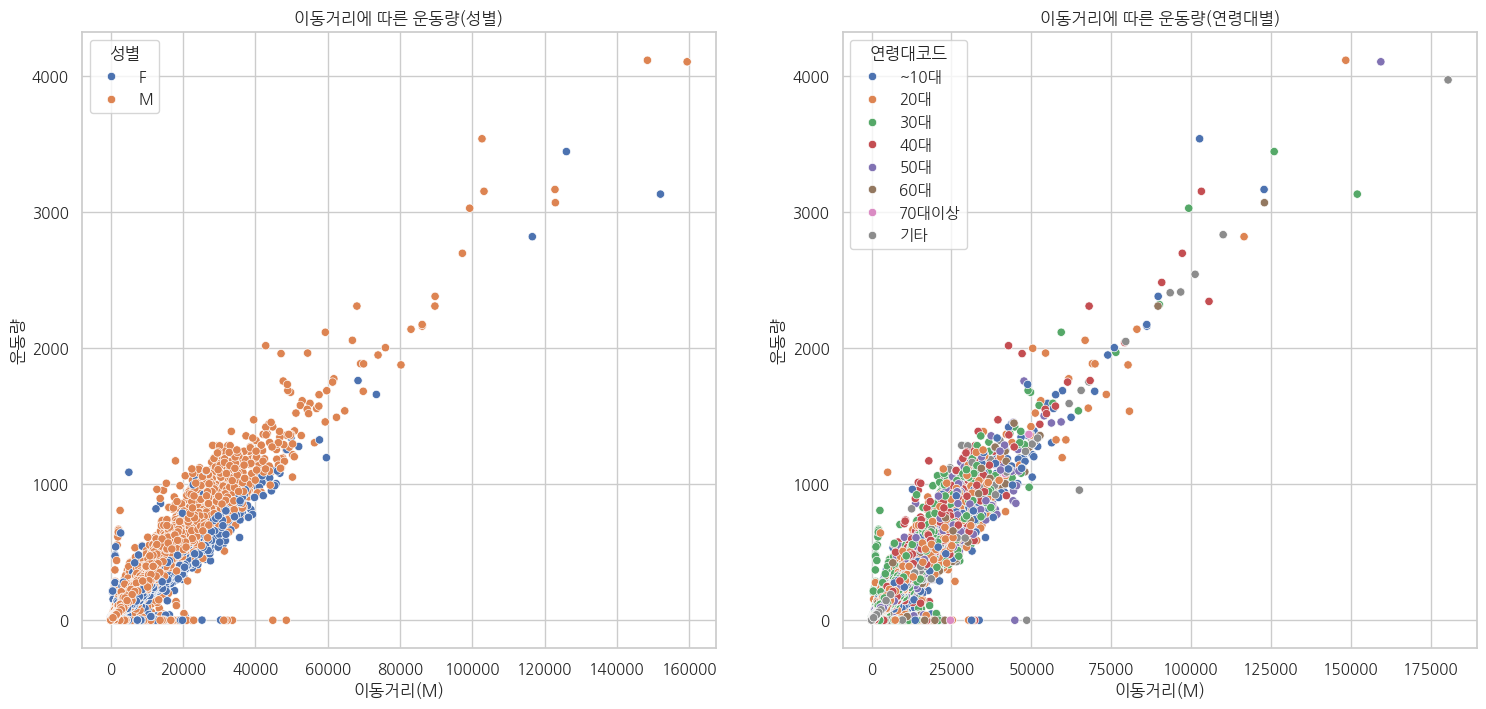

In [33]:
# 운동량과 이동거리의 상관관계(scatter)
# 성별, 연령대별

f, ax = plt.subplots(1, 2, figsize=(18,8))

sns.scatterplot(data=bike3, x='이동거리(M)', y='운동량', hue='성별', ax=ax[0])
ax[0].set_title('이동거리에 따른 운동량(성별)')


sns.scatterplot(data=bike3, x='이동거리(M)', y='운동량', hue='연령대코드', ax=ax[1])
ax[1].set_title('이동거리에 따른 운동량(연령대별)')
plt.show()

In [34]:
bike3.head(3)

# 대여일자 => 대여년, 대여월, 대여일 새 컬럼 생성

bike3['대여년'] = bike3['대여일자'].dt.year
bike3['대여월'] = bike3['대여일자'].dt.month
bike3['대여일'] = bike3['대여일자'].dt.day

In [35]:
bike3.head(3)

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),대여소명_new,대여년,대여월,대여일
0,2024-12-01,0,1442,1442. 중랑구청 중화동 별관 앞,정기권,NaN,~10대,1,105.32,0.66,2829.30,18,중랑구청 중화동 별관 앞,2024,12,1
1,2024-12-01,0,2728,2728.마곡나루역 3번 출구,정기권,NaN,~10대,1,22.45,0.25,1090.00,7,마곡나루역 3번 출구,2024,12,1
2,2024-12-01,0,1023,1023. 한국종합기술사옥 앞,정기권,NaN,20대,1,148.31,0.87,3745.23,21,한국종합기술사옥 앞,2024,12,1


In [40]:
# 성별에 따른 일별 사용시간 합계

# pivot 
# pivot_table : 집계 함수(sum,avg,count,mean,median...) 사용

bike_fm = bike3.pivot_table(index='대여일', columns='성별', values='이용시간(분)', aggfunc=sum)
bike_fm

성별,F,M
대여일,,
1,286334,621511
2,467600,898914
3,419352,784444
4,428179,817205
5,363258,698185
6,410997,776574
7,322787,619143
8,218665,482006
9,407735,755674


<Axes: xlabel='대여일'>

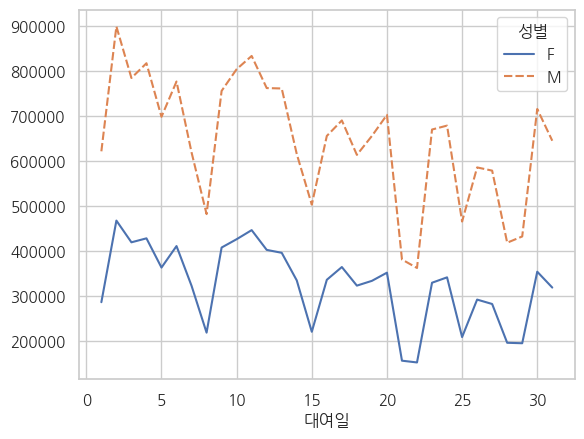

In [41]:
sns.lineplot(bike_fm)

In [ ]:
# 구별 거치대 개수 지도에 표시
# 1. 새 컬럼생성 : 총거치대수 = 거치대수lcd + 거치대수qr

bike1['총거치대수'] = bike1['거치대수lcd'] + bike1['거치대수qr']
bike1.head()

,대여소번호,대여소명,자치구,설치시기,거치대수lcd,거치대수qr,운영방식,총거치대수
0,301,경복궁역 7번출구 앞,종로구,2015-10-07 12:03:46,20.0,20.0,QR,40.0
1,302,경복궁역 4번출구 뒤,종로구,2015-10-07 12:04:22,12.0,12.0,QR,24.0
2,303,광화문역 1번출구 앞,종로구,2015-10-07 00:00:00,8.0,8.0,QR,16.0
3,305,종로구청 옆,종로구,2015-01-07 00:00:00,16.0,16.0,QR,32.0
4,307,서울역사박물관 앞,종로구,2015-10-07 12:09:09,11.0,11.0,QR,22.0


In [54]:
# 2. 구별 거치대 개수 집계
# bike_gu

bike_gu = pd.DataFrame(bike1.groupby('자치구')['총거치대수'].sum())

In [55]:
bike_gu.head()

,총거치대수
자치구,
강남구,1950.0
강동구,1535.0
강북구,640.0
강서구,3073.0
관악구,959.0


In [ ]:
# 3. 지도
# !pip install folium



  Using cached folium-0.20.0-py2.py3-none-any.whl.metadata (4.2 kB)
  Using cached branca-0.8.1-py3-none-any.whl.metadata (1.5 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached xyzservices-2025.4.0-py3-none-any.whl.metadata (4.3 kB)
  Using cached MarkupSafe-3.0.2-cp313-cp313-win_amd64.whl.metadata (4.1 kB)
Using cached folium-0.20.0-py2.py3-none-any.whl (113 kB)
Using cached branca-0.8.1-py3-none-any.whl (26 kB)
Using cached jinja2-3.1.6-py3-none-any.whl (134 kB)
Using cached xyzservices-2025.4.0-py3-none-any.whl (90 kB)
Using cached MarkupSafe-3.0.2-cp313-cp313-win_amd64.whl (15 kB)



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [50]:
import json

# 우리나라 위,경도 정보 가져오기
geo_str = json.load(open("./data/skorea_municipalities_geo_simple.json", encoding='utf-8'))

In [57]:
import folium

m = folium.Map(location=(37.5502, 126.982))

folium.Choropleth(
    geo_data=geo_str,
    name="choropleth",
    data=bike_gu['총거치대수'],
    columns=["자치구", "총거치대수"],
    key_on="properties.name",
    fill_color="YlGnBu",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="구별 거치대 개수",
).add_to(m)

m

In [61]:
# 구별 대여건수 지도에 표시

bike2.head(1)

,자치구,대여소명,기준년월,대여건수,반납건수,대여소번호,대여소명_new
0,마포구,108. 서교동 사거리,202407,1597,1609,108,서교동 사거리


In [64]:
bike2.dtypes
bike2[bike2['기준년월'] == 202408]

,자치구,대여소명,기준년월,대여건수,반납건수,대여소번호,대여소명_new
2733,마포구,108. 서교동 사거리,202408,1787,1794,108,서교동 사거리
2734,양천구,729. 서부식자재마트 건너편,202408,2020,2358,729,서부식자재마트 건너편
2735,양천구,731. 서울시 도로환경관리센터,202408,3743,3750,731,서울시 도로환경관리센터
2736,양천구,732. 신월중학교,202408,1019,1020,732,신월중학교
2737,양천구,733. 신정이펜하우스314동,202408,534,371,733,신정이펜하우스314동
...,...,...,...,...,...,...,...
5450,양천구,722. 경서농협 버스정류장(우리은행신정동지점방향),202408,1508,1547,722,경서농협 버스정류장(우리은행신정동지점방향)
5451,양천구,723. SBS방송국,202408,2290,2307,723,SBS방송국
5452,양천구,724. 계남공원 입구 주출입구 좌측,202408,280,184,724,계남공원 입구 주출입구 좌측
5453,양천구,725. 양강중학교앞 교차로,202408,203,202,725,양강중학교앞 교차로


In [66]:
# 1. 기준년월 202408 행 추출
bike_month = bike2[bike2['기준년월'] == 202408]

In [68]:
# 2. 자치구별 대여건수 합계

bike_month = pd.DataFrame(bike_month.groupby('자치구')['대여건수'].sum())
bike_month

,대여건수
자치구,
강남구,123417
강동구,171985
강북구,53974
강서구,508323
관악구,91212
광진구,187451
구로구,166183
금천구,73390
노원구,251014


In [69]:
m = folium.Map(location=(37.5502, 126.982))

folium.Choropleth(
    geo_data=geo_str,
    name="choropleth",
    data=bike_month['대여건수'],
    columns=["자치구", "대여건수"],
    key_on="properties.name",
    fill_color="PuRd", 
    legend_name="구별 대여건수",
).add_to(m)

m